# Análisis de Tienda Online 

## Descripción de los datos
**Datos utilizados en la primera parte del proyecto**

**/datasets/hypotheses_us.csv**

- Hypotheses: breves descripciones de las hipótesis.
- Reach: alcance del usuario, en una escala del uno a diez.
- Impact: impacto en los usuarios, en una escala del uno al diez.
- Confidence: confianza en la hipótesis, en una escala del uno al diez.
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

**Datos utilizados en la segunda parte del proyecto**

**/datasets/orders_us.csv**

- transactionId: identificador de pedido.
- visitorId: identificador del usuario que realizó el pedido.
- date: fecha del pedido.
- revenue: ingresos del pedido.
- group: el grupo del test A/B al que pertenece el usuario.

**/datasets/visits_us.csv**

- date: la fecha.
- group: grupo de la prueba A/B.
- visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

## Preparación de los Datos 

In [1]:
## Importar librerias 
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import plotly.express as px
from datetime import datetime
import random
import plotly.graph_objects as go

In [2]:
## Cargar los DATAFRAME 
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

## Información de cada Data Frame 

In [3]:
#Visualizar información del dataframe hypotheses:
print(hypotheses.info())
hypotheses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


No se encuentran valores ausentes en el Dataset , pero los nombres de las variables debemos cambiarlas a minúsculas .

In [4]:
print(orders.info())
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


Hay un total de 1197 filas y 5 columnas. No hay valores ausentes en ninguna columna.El tipo de dato de la columna date no es el correcto por lo que debe convertirse de 'object' a 'datetime'. Cambiar el nombre de las variables separandolas con guión bajo.

In [5]:
print(visits.info())
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Cambiar el dtype de date a a tipo 'datetime', no hay valores ausentes en las columnas.

## Modificación y enriquecimiento de la Data

**Hypothenses**

In [6]:
# Se cambian los nombres de las columnas del dataframe hypotheses a minúsculas:
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


**Orders**

In [7]:
# Se cambian los nombres de lac columnas del dataframe orders a minúsculas y se separan las palabras de los nombres
# con guión bajo:
orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace = True)

# Se cambia el tipo de dato de la columna 'date' de 'object' a 'datetime': 
orders['date'] = pd.to_datetime(orders['date'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


Nota : Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

In [8]:
# Agrupación de visitantes contando la cantidad de grupos a los que pertenece:
n_groups = orders.groupby('visitor_id')['group'].nunique()
# Viitantes que pertenecen a ambos grupos:
duplicated_visitors = n_groups[n_groups > 1].index
# Elimiar las filas correspondientes:
filtred_orders = orders[~orders['visitor_id'].isin(duplicated_visitors)].reset_index(drop = True)

print('Se ha eliminado un total de', len(orders) - len(filtred_orders), 'registros de visitantes',
      'que pertenecían a ambos grupos.')

Se ha eliminado un total de 181 registros de visitantes que pertenecían a ambos grupos.


**Visits**

In [9]:
# Se cambia el tipo de dato de la columna 'date' del dataframe 'visits' de object a 'datetime':
visits['date'] = pd.to_datetime(visits['date'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Parte 1. Priorizar hipótesis

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

* Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
* Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
* Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

### Framework ICE

In [10]:
# Se obtiene el ICE SCORE para cada hipótesis:
hypotheses['ice_score'] = (hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']).round(2)



In [11]:
# Se muestran los resultados de las ICE SCORE ordenados de forma decreciente:
print('A continuación, se presentan los ICE SCORE para cada hipótesis ordenados de mayor a menor ICE SCORE:')
hypotheses.sort_values(by = 'ice_score', ascending = False)[['hypothesis', 'ice_score']]

A continuación, se presentan los ICE SCORE para cada hipótesis ordenados de mayor a menor ICE SCORE:


,hypothesis,ice_score
8,Launch a promotion that gives users discounts ...,16.20
0,Add two new channels for attracting traffic. T...,13.33
7,Add a subscription form to all the main pages....,11.20
6,Show banners with current offers and sales on ...,8.00
2,Add product recommendation blocks to the store...,7.00
1,Launch your own delivery service. This will sh...,2.00
5,Add a customer review page. This will increase...,1.33
3,Change the category structure. This will incre...,1.12
4,Change the background color on the main page. ...,1.00


**Gráfica con los resultados de los ICE SCORE para cada hipótesis:**



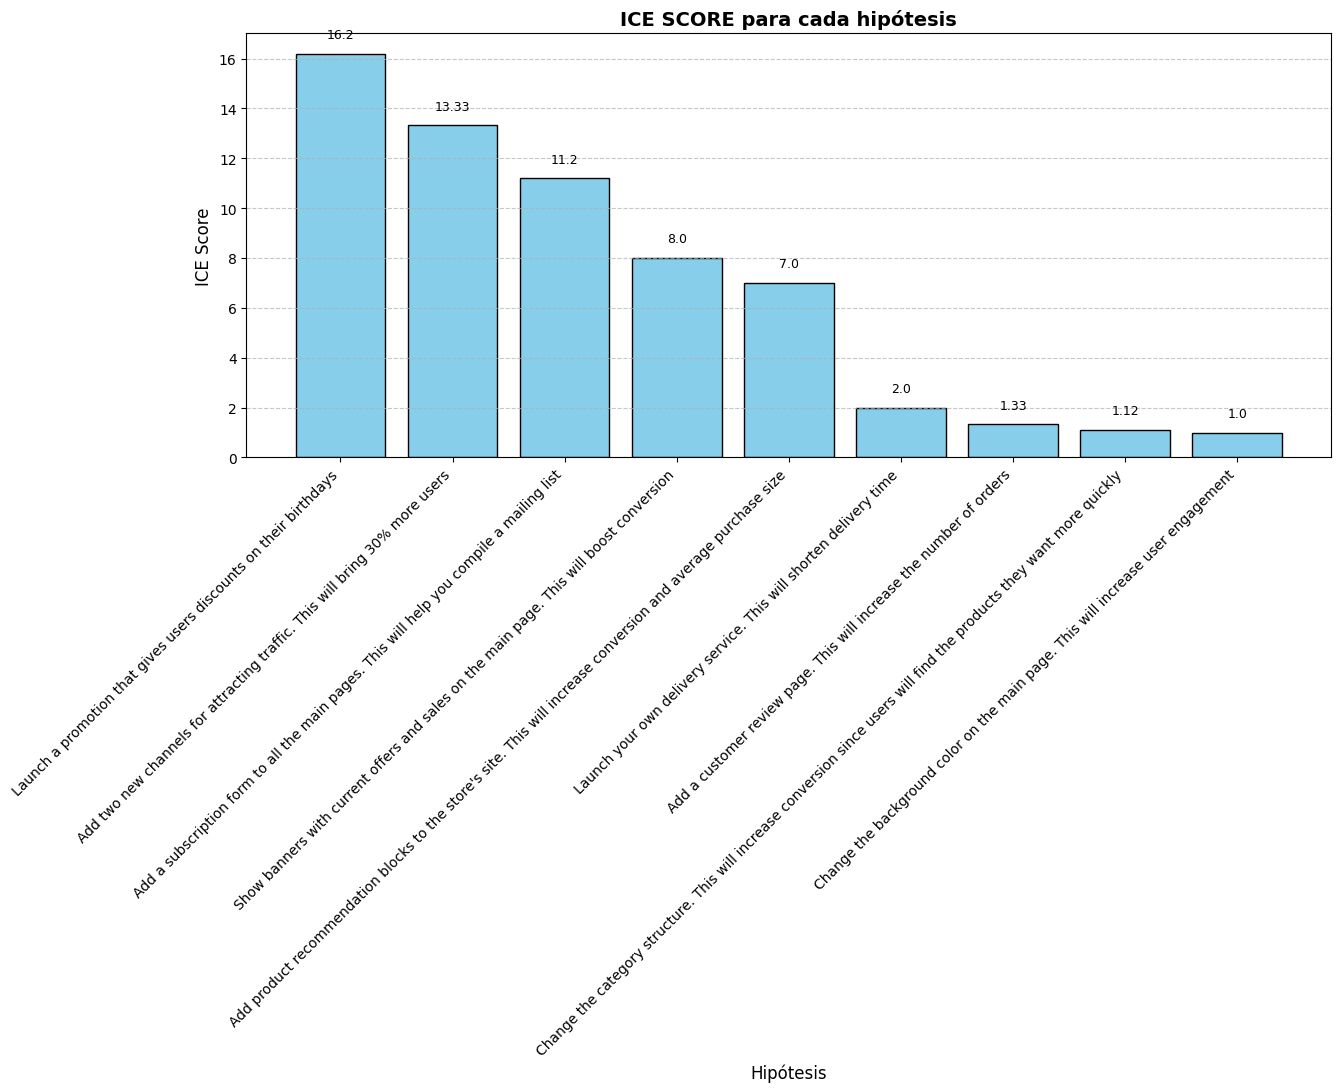

In [12]:
# Ordenar por ICE Score
hyp_sorted = hypotheses.sort_values(by='ice_score', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(14, 8))  # aumentamos tamaño
bars = plt.bar(hyp_sorted['hypothesis'], hyp_sorted['ice_score'], color='skyblue', edgecolor='black')

# Agregar etiquetas sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2),
             ha='center', va='bottom', fontsize=9)

# Títulos y etiquetas
plt.title("ICE SCORE para cada hipótesis", fontsize=14, fontweight='bold')
plt.xlabel("Hipótesis", fontsize=12)
plt.ylabel("ICE Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes
plt.subplots_adjust(bottom=0.35)

# Mostrar gráfico
plt.show()


### Framework RICE

In [13]:
# Se obtiene el RICE SCORE para cada hipótesis:
hypotheses['rice_score'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] /
                            hypotheses['effort']).round(2)

In [14]:
# Se muestran los resultados de las RICE SCORE ordenados de forma decreciente:
print('A continuación, se presentan los RICE SCORE para cada hipótesis ordenados de mayor a menor RICE SCORE:')
hypotheses.sort_values(by = 'rice_score', ascending = False)[['hypothesis', 'rice_score']]

A continuación, se presentan los RICE SCORE para cada hipótesis ordenados de mayor a menor RICE SCORE:


,hypothesis,rice_score
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


**Gráfica con los resultados de los RICE SCORE para cada hipótesis:**


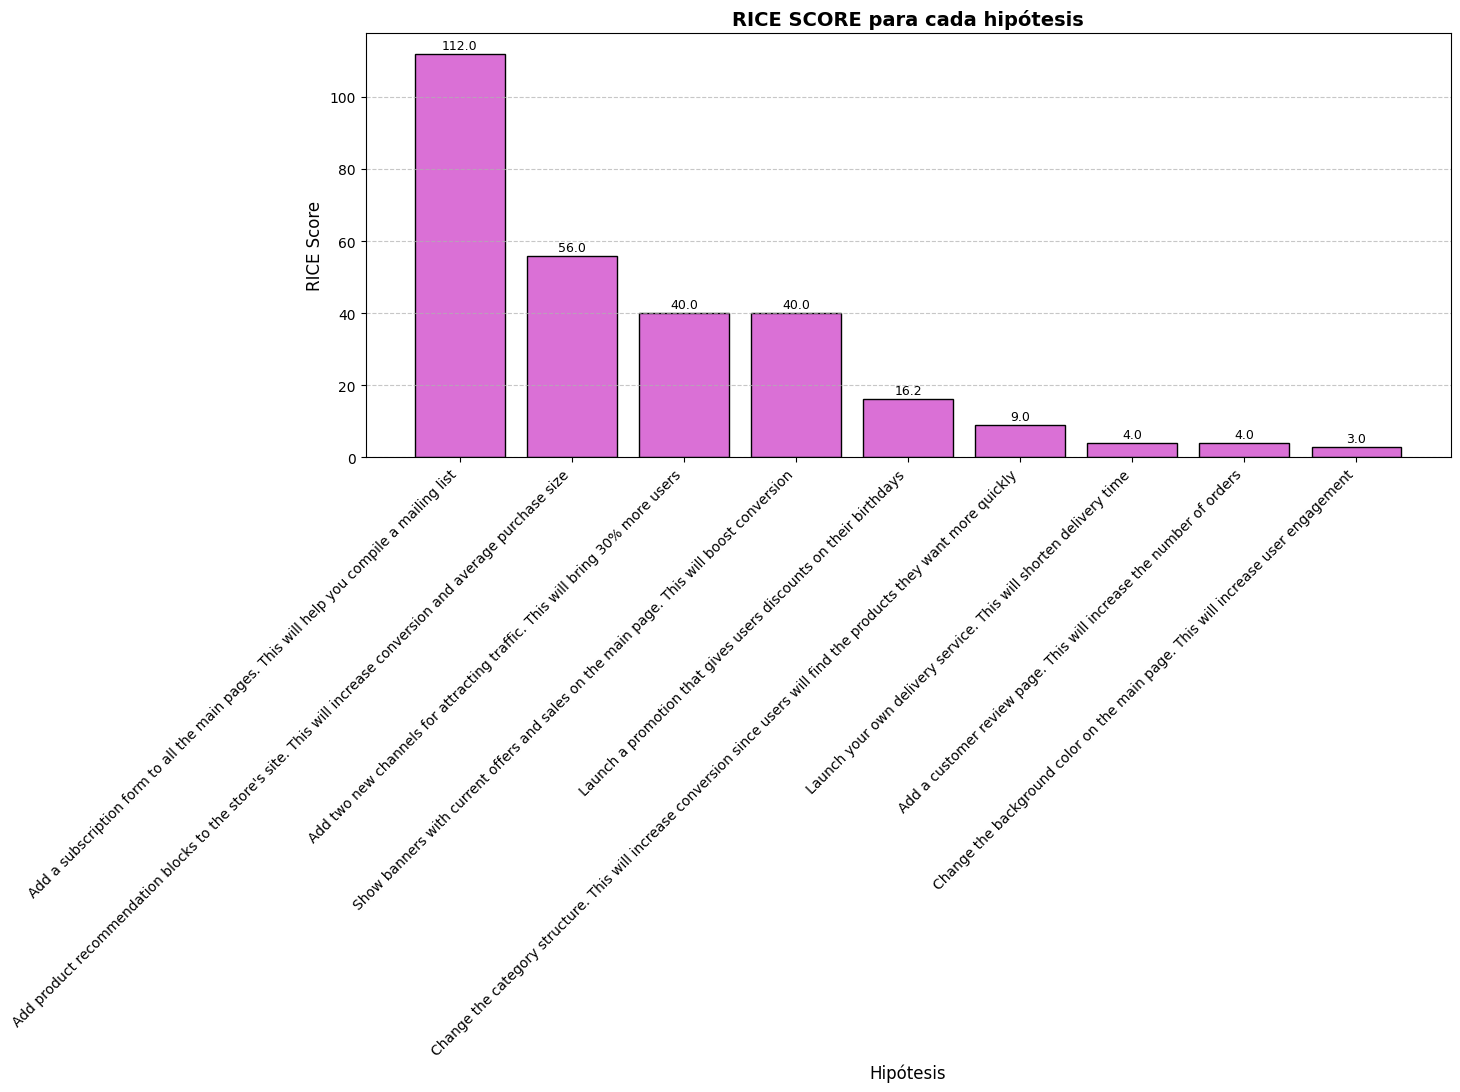

In [15]:
# Ordenar por RICE Score
hyp_sorted_rice = hypotheses.sort_values(by='rice_score', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(hyp_sorted_rice['hypothesis'], hyp_sorted_rice['rice_score'], color='orchid', edgecolor='black')

# Agregar etiquetas de valor sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2),
             ha='center', va='bottom', fontsize=9)

# Títulos y etiquetas
plt.title("RICE SCORE para cada hipótesis", fontsize=14, fontweight='bold')
plt.xlabel("Hipótesis", fontsize=12)
plt.ylabel("RICE Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar márgenes inferiores para que no se corten etiquetas
plt.subplots_adjust(bottom=0.35)

# Mostrar gráfico
plt.show()


Al observar las gráficas generadas para los ICE y RICE Score, se evidencian diferencias importantes en la priorización de las hipótesis.

* La hipótesis “Launch a promotion that gives users discounts on their first purchase” obtuvo el ICE Score más alto (16.2) y también se mantuvo en el primer lugar en el ranking RICE (129.6). Esto indica que no solo tiene buen impacto, confianza y bajo esfuerzo, sino también un gran alcance.

 Sin embargo, otras hipótesis cambiaron de posición significativamente. Por ejemplo:

“Add a subscription form to all the main pages” tenía un ICE Score alto de 11.2 (puesto 3 en ICE), pero su RICE Score fue de solo 44.8, bajando varios lugares en la priorización. Esto se debe a su bajo alcance (Reach = 2).

* Por otro lado, “Show banners with current offers and sales on the main page” tenía un ICE Score de solo 8.0, pero su RICE Score subió a 96.0, colocándola entre las más relevantes. Esto se debe a que su alcance es mucho mayor (Reach = 8), lo cual incrementa su prioridad en el modelo RICE.

* En general, la gráfica RICE mostró un contraste más marcado entre las hipótesis, al considerar la cantidad de personas potencialmente beneficiadas. Algunas hipótesis con ICE moderado escalaron posiciones gracias a su amplio alcance.

**Conclusión final:** El análisis muestra que si el objetivo es maximizar el impacto sobre un mayor número de usuarios, el modelo RICE ofrece una evaluación más completa y estratégica. Se recomienda usar RICE como el método principal para priorizar hipótesis en contextos donde el alcance es un factor clave para el éxito del negocio.

## Parte 2. Análisis del test A/B

#### 1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.





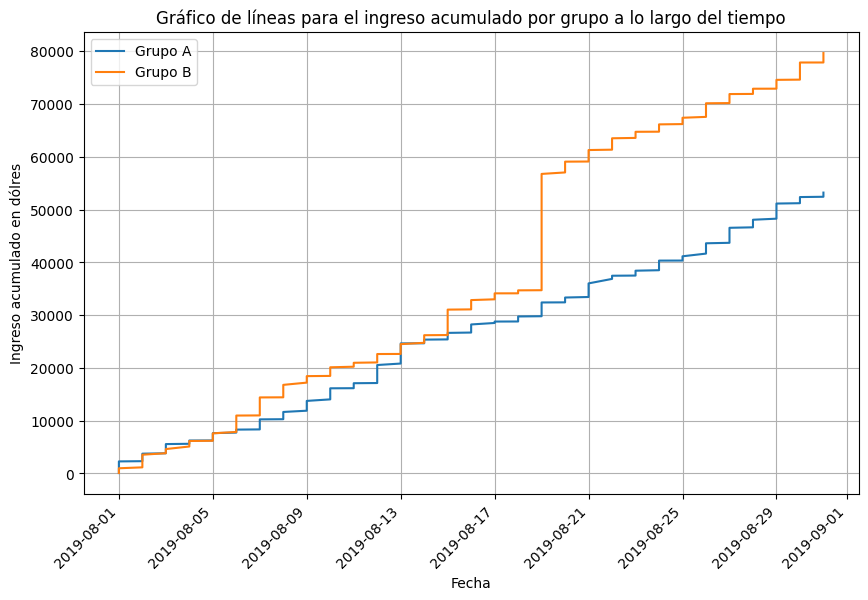

In [16]:
# Se extrae la información de las ventas del grupo A y se ordenan cronológicamente:
cumulative_revenue_a = filtred_orders[filtred_orders['group'] == 'A'].sort_values(by = 'date')

# Se genera una columna en la que se calcula el ingreso acumulado por día para el grupo A:
cumulative_revenue_a['cumulative_revenue'] = cumulative_revenue_a['revenue'].cumsum()

# Se extrae la información de las ventas del grupo B y se ordenan cronológicamente:
cumulative_revenue_b = filtred_orders[filtred_orders['group'] == 'B'].sort_values(by = 'date')

# Se genera una columna en la que se calcula el ingreso acumulado por día para el grupo B:
cumulative_revenue_b['cumulative_revenue'] = cumulative_revenue_b['revenue'].cumsum()

# Se dimensiona la gráfica:
plt.figure(figsize=(10, 6))

# Trazar gráfico de ingresos del grupo A:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['cumulative_revenue'], label = 'Grupo A')

# Trazar gráfico de ingresos del grupo A:
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['cumulative_revenue'], label = 'Grupo B')

# Se asignan nombres a los ejes y a la gráfica:
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado en dólres')
plt.title('Gráfico de líneas para el ingreso acumulado por grupo a lo largo del tiempo')

# Se muestra la cuadrícula:
plt.grid(True)

# Se rotan con un angulo de 45 grados en sentido 
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.show()

Hasta el 5 de agosto las ventas acumuladas de los 2 grupos son similares.

A partir del 6 de agosto hasta el 15 de agosto las ventas acumuladas del grupo B son ligeramente mayores a las del grupo A pero se igualan los días 13 y 14 de agosto.

Del 15 de agosto en adelante al 18 de agosto, la diferencia acumulada del grupo B supera a la del grupo A pero no por mucho.

Del 19 de agosto en adelante la diferencia de las ventas acumuladas del grupo B supera con casi 30 mil dólares aproximadamente al grupo A y a partir de ese día y hasta el fin de ese mes el grupo A no vuelve a acumular ventas que superen al grupo B.

Esto puede deberse a que ese día en particular la empresa haya añadido una modificación al sitio web que haya generado esa gran variación que presentó el grupo B.

### 2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

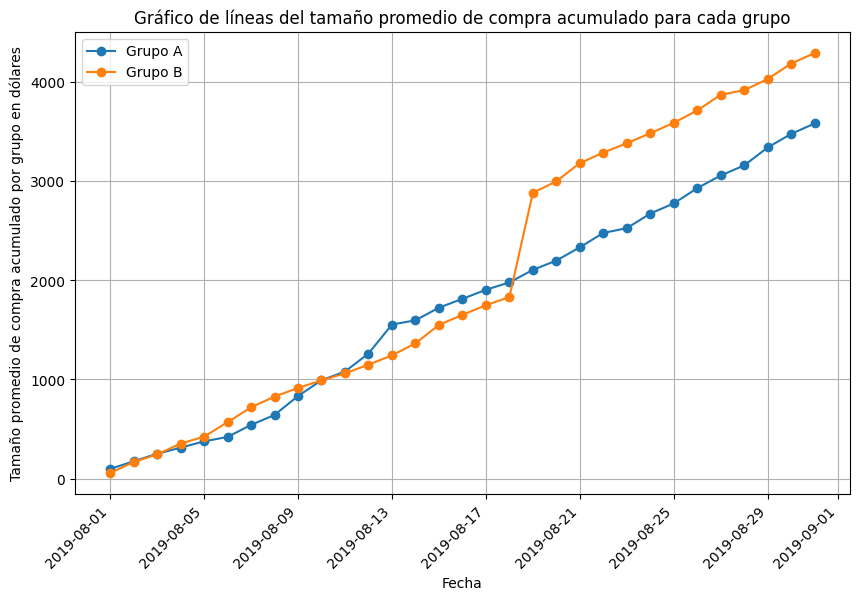

In [17]:
# Se calcula el tamaño promedio de compra del grupo A para cada día:
average_order_size_a = filtred_orders[filtred_orders['group'] == 'A'].groupby(['date']).agg({'revenue':'mean'})

# Se calcula el tamaño promedio de compra del grupo B para cada día:
average_order_size_b = filtred_orders[filtred_orders['group'] == 'B'].groupby(['date']).agg({'revenue':'mean'})

# Se calcula el promedio de compra aucmulada para el grupo A:
cumulative_average_order_size_a = average_order_size_a.cumsum()

# Se calcula el tamaño promedio de compra acumulada para el grupo B:
cumulative_average_order_size_b = average_order_size_b.cumsum()

# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))

# Se grafican los valores para el promedio de compra acumulado del grupo A:
plt.plot(cumulative_average_order_size_a.index, cumulative_average_order_size_a.values, label = 'Grupo A', marker='o')

# Se grafican los valores para el promedio de compra acumulado del grupo B:
plt.plot(cumulative_average_order_size_b.index, cumulative_average_order_size_b.values, label = 'Grupo B', marker='o')

# Se agregan etiquetas de los ejes y se asigna el nombre de la gráfica:
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio de compra acumulado por grupo en dólares')
plt.title('Gráfico de líneas del tamaño promedio de compra acumulado para cada grupo')

# Se muestra la cuadrícula:
plt.grid(True)

# Se rotan las etiquetas del eje X para que tener una mejor visualización de las fechas:
plt.xticks(rotation=45, ha='right') 

# Mostrar la leyenda:
plt.legend()

# Se muestra la gráfica:
plt.show()

#### Conclusiones sobre el tamaño promedio de compra acumulado por grupo
1. **Tendencia general ascendente**  
   Ambas curvas (grupo A y grupo B) muestran un crecimiento constante en el tamaño promedio de compra acumulado, lo cual es esperado al tratarse de un acumulado diario.

2. **Grupo B con valores más altos**  
   El grupo B mantiene un tamaño de pedido promedio acumulado más alto que el grupo A durante casi todo el período del experimento. Esto sugiere que los usuarios del grupo B podrían estar realizando pedidos más grandes.

3. **Brecha consistente entre los grupos**  
   La diferencia entre los grupos se mantiene o incluso se incrementa con el tiempo, lo que podría indicar que la variante aplicada al grupo B tiene un efecto positivo sostenido.

4. **Mayor variabilidad al inicio**  
   En los primeros días, las fluctuaciones son mayores debido al bajo volumen de datos. A medida que avanza el experimento, las curvas se estabilizan.

####  Conjeturas

- La variante aplicada al grupo B podría estar generando un comportamiento más favorable en cuanto al valor promedio de compra.
- Es recomendable analizar si existen **valores atípicos** que estén influyendo en estas diferencias.
- Si esta diferencia se mantiene estadísticamente significativa, podría ser conveniente **adoptar la variante del grupo B** para aumentar los ingresos.


### 3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

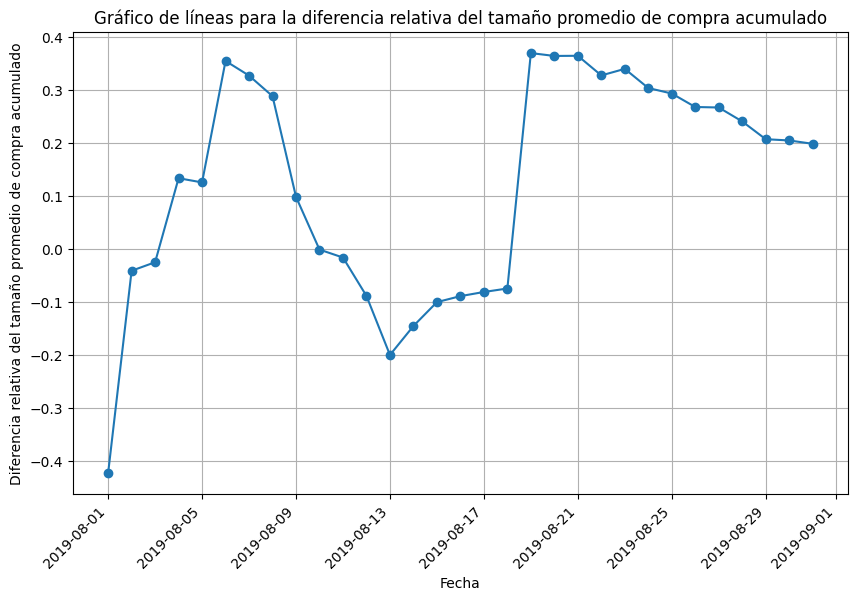

In [18]:
# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))

plt.plot(cumulative_average_order_size_b.index,
         cumulative_average_order_size_b.values / cumulative_average_order_size_a.values - 1,
         marker = 'o')

# Se agregan etiquetas de los ejes y se asigna el nombre de la gráfica:
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa del tamaño promedio de compra acumulado')
plt.title('Gráfico de líneas para la diferencia relativa del tamaño promedio de compra acumulado')

# Se muestra la cuadrícula:
plt.grid(True)

# Se rotan las etiquetas del eje X para que tener una mejor visualización de las fechas:
plt.xticks(rotation=45, ha='right') 

# Se muestra la gráfica:
plt.show()

#### Gráfico del Tamaño Promedio de Compra Acumulado por Grupo

Este gráfico muestra cómo varía el tamaño promedio de las compras acumuladas a lo largo del tiempo para los grupos A y B del test A/B.

####  Observaciones

1. **Grupo B muestra un rendimiento superior**  
   A lo largo del período del experimento, el grupo B mantiene un tamaño promedio de compra acumulado mayor que el grupo A.

2. **Tendencia ascendente esperada**  
   Dado que se trata de un acumulado, ambas curvas crecen con el tiempo. Sin embargo, la pendiente del grupo B es más pronunciada, lo cual indica un mejor desempeño sostenido.

3. **Diferencia constante o creciente entre grupos**  
   La separación entre las curvas sugiere que el grupo B podría estar respondiendo mejor al cambio implementado, generando pedidos de mayor valor.

4. **Variación destacable a partir del 19 de agosto**  
   De forma análoga a lo que ocurrió con las ventas acumuladas por grupos, el tamaño promedio de cada compra por día fue similar en los dos grupos hasta el 18 de agosto.  
   A partir del 19 de agosto, el tamaño promedio de compra acumulado para el grupo B **superó en casi 1000 dólares por día al grupo A**, y esta tendencia se mantuvo hasta el último día del mes.

   Esta variación tan grande sugiere que **pudo haberse realizado un cambio en el sitio web** mostrado a los usuarios del grupo B —por ejemplo, una mejora en la interfaz o en la experiencia de usuario que **facilitó significativamente las compras**.

#### Conclusión

El grupo B no solo mostró un rendimiento superior en términos de tamaño promedio de compra acumulado, sino que **experimentó una mejora repentina y sostenida desde el 19 de agosto**, posiblemente por una intervención específica. Esta diferencia, si es estadísticamente significativa, **indica que la variante aplicada al grupo B podría ser más efectiva** para aumentar los ingresos y debería considerarse seriamente para su implementación a largo plazo.



### 4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

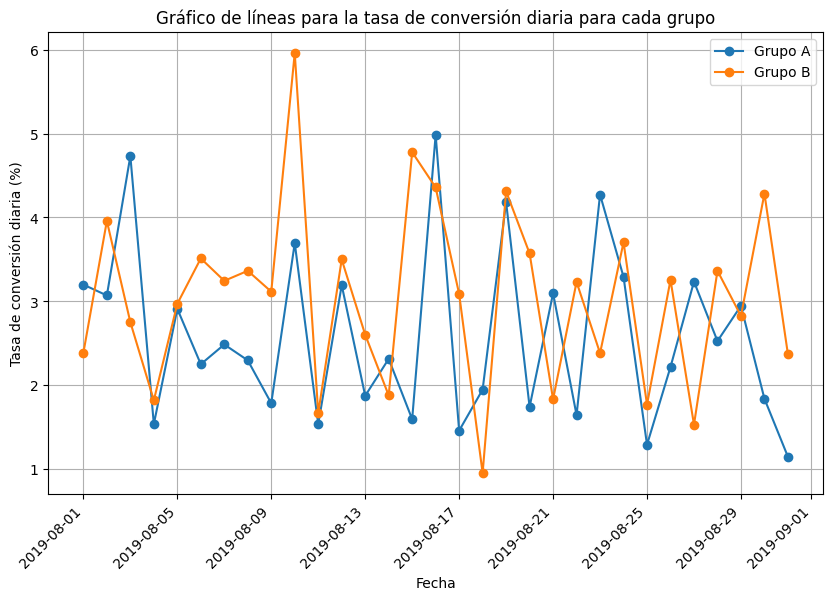

In [19]:
# Se calcula la cantidad de transacciones diarias para cada grupo:
n_transactions_a = filtred_orders[filtred_orders['group'] == 'A'].groupby('date')['transaction_id'].nunique()
n_transactions_b = filtred_orders[filtred_orders['group'] == 'B'].groupby('date')['transaction_id'].nunique()

# Se calclula la cantidad de visitas diarias por grupo:
n_visits_a = visits[visits['group'] == 'A'].sort_values(by = 'date')
n_visits_b = visits[visits['group'] == 'B'].sort_values(by = 'date')

# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))

# Se grafica la tasa de conversión diaria para cada grupo:

plt.plot(n_transactions_a.index,
         n_transactions_a.values / n_visits_a['visits'] * 100,
         label = 'Grupo A',
         marker = 'o')

plt.plot(n_transactions_b.index,
         n_transactions_b.values / n_visits_b['visits'] * 100,
         label = 'Grupo B',
         marker = 'o')

# Se agregan etiquetas de los ejes y se asigna el nombre de la gráfica:
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión diaria (%)')
plt.title('Gráfico de líneas para la tasa de conversión diaria para cada grupo')

# Se muestra la cuadrícula:
plt.grid(True)

# Se rotan las etiquetas del eje X para que tener una mejor visualización de las fechas:
plt.xticks(rotation=45, ha='right') 

# Mostrar la leyenda:
plt.legend()

# Se muestra la gráfica:
plt.show()

#### Conclusiones basadas en la tasa de conversión diaria para los grupos A y B

- La tasa de conversión diaria para cada grupo es muy variable, con fluctuaciones significativas día a día, lo que sugiere que múltiples factores influyeron en el comportamiento de los usuarios a lo largo del experimento.

- Los porcentajes de conversión oscilaron aproximadamente entre el 1% y el 6%, mostrando un rango consistente con expectativas normales para pruebas A/B.

- De los 31 días de la prueba, el grupo A tuvo una mayor tasa de conversión en 9 días, mientras que el grupo B superó al grupo A en 22 días. Esto indica un desempeño claramente superior del grupo B durante la mayor parte del experimento.

- El grupo B alcanzó su mayor tasa de conversión el 10 de agosto con un 6%, que fue además el valor máximo observado para ambos grupos en todo el período.

- El grupo A obtuvo su pico máximo el 16 de agosto con un 5%, un valor alto pero inferior al máximo del grupo B.

- La tasa de conversión más baja registrada fue para el grupo B, con un valor inferior al 1% el 18 de agosto, reflejando que, aunque generalmente mejor, el grupo B también tuvo días de bajo rendimiento.

- Considerando que el grupo B tuvo mayor tasa de conversión en la mayoría de los días, es muy probable que los usuarios hayan respondido mejor a los cambios implementados en el grupo B respecto a la versión original del grupo A.


#### 5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

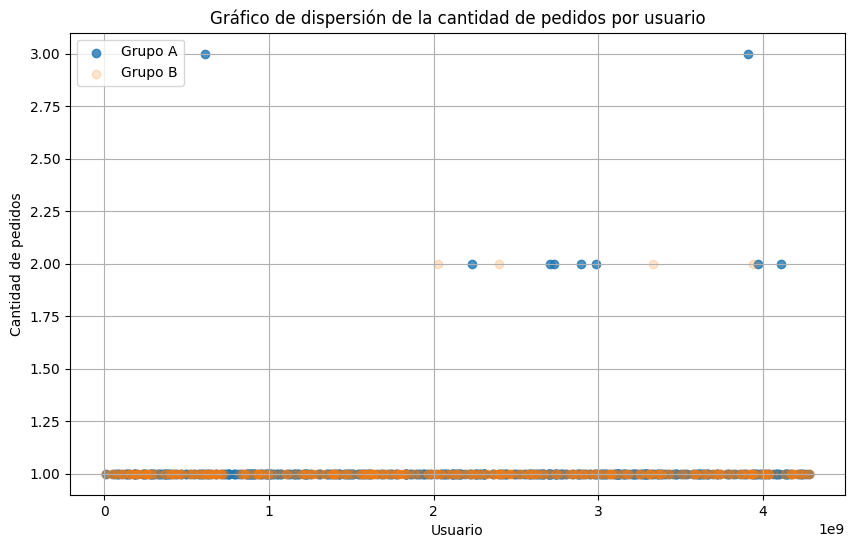

In [20]:
# Se halla la cantidad de transacciones para cada visitante del grupo A:
transactions_per_visitor_a = (filtred_orders[filtred_orders['group'] == 'A'].groupby(['date','visitor_id'])
                              .agg({'transaction_id': 'nunique'})).reset_index()

# Se cambia el nombre de la columna de agregación por un nombre descriptivo:
transactions_per_visitor_a.rename(columns = {'transaction_id': 'n_transactions'}, inplace = True)

# Se calcula la cantidad de transacciones para cada visitante del grupo B:
transactions_per_visitor_b = (filtred_orders[filtred_orders['group'] == 'B'].groupby(['date', 'visitor_id'])
                              .agg({'transaction_id': 'nunique'})).reset_index()

# Se cambia el nombre de la columna de agregación por un nombre descriptivo:
transactions_per_visitor_b.rename(columns = {'transaction_id': 'n_transactions'}, inplace = True)

# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))

# Se realiza gráfico de despersión para el grupo A:
plt.scatter(transactions_per_visitor_a['visitor_id'],
            transactions_per_visitor_a['n_transactions'],
            label = 'Grupo A',
            alpha = 0.8)

# Se realiza gráfico de dispersión paea el grupo B:
plt.scatter(transactions_per_visitor_b['visitor_id'],
            transactions_per_visitor_b['n_transactions'],
            label = 'Grupo B',
            alpha = 0.2)

# Se asignan los nombres a los ejes y al gráfico:
plt.xlabel("Usuario")
plt.ylabel("Cantidad de pedidos")
plt.title("Gráfico de dispersión de la cantidad de pedidos por usuario")

# Se muestra la cuadrícula:
plt.grid(True)

# Se muestra la leyenda:
plt.legend()
# Mostrar el gráfico
plt.show()

La mayoría de los usuarios en ambos grupos realizan un solo pedido.

Muy pocos visitantes realizaron 2 o 3 pedidos en todo el mes para ambos grupos.

El número de pedidos por usuario no varía significativamente de un grupo a otro.

Se presume que las modificaciones para el grupo B no inciden en la cantidad de compras que realiza el usuario en el mes.

### 6. Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.







In [21]:
print('El percentil 95 del número de pedidios por usuario es',
      np.percentile(orders.groupby('visitor_id')['transaction_id'].nunique(), 95))

El percentil 95 del número de pedidios por usuario es 2.0


In [22]:
print('El percentil 99 del número de pedidios por usuario es',
      np.percentile(orders.groupby('visitor_id')['transaction_id'].nunique(), 99))

El percentil 99 del número de pedidios por usuario es 4.0


* El 95% de los visitantes no realizaron más de 2 pedidos en el mes de estudio.

* Menos el 1% de los usuarios realizaron más de 2 pedidos en el mes.

* Observando la gráfica de dispersión de la cantidad de pedidos por usuario y observando el cálculo de los percentiles, se considerarán los usuarios con más de 2 pedidos como datos atípicos.

### 7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

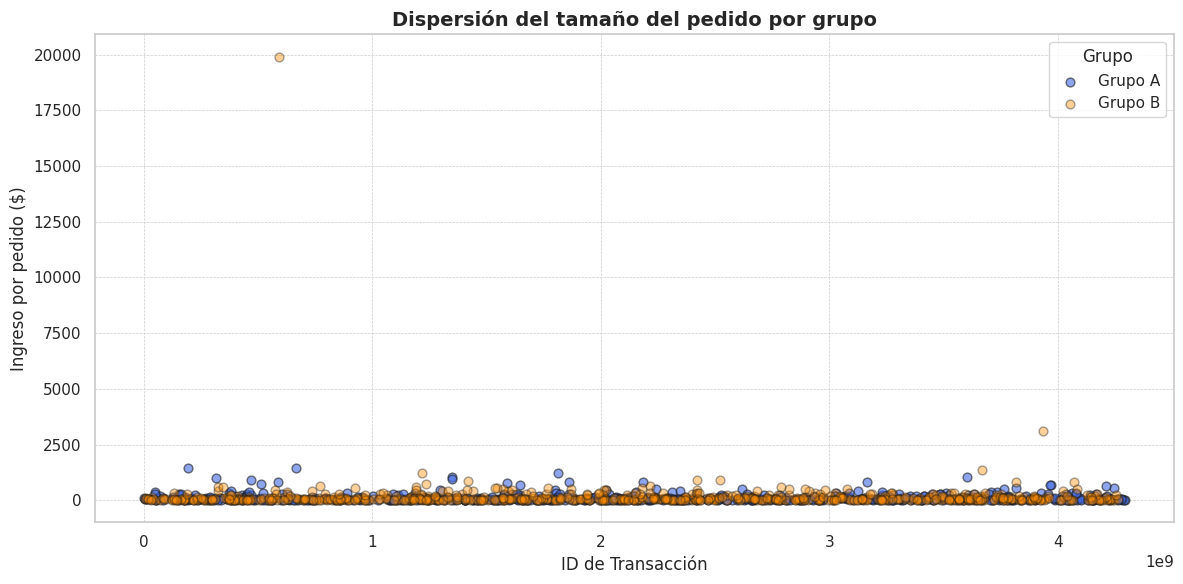

In [23]:
# Configurar estilo visual
sns.set(style="whitegrid")

# Ordenar los datos por fecha si es posible, para mejorar la lectura (opcional)
orders_sorted = orders.sort_values(by='date')

# Crear la figura
plt.figure(figsize=(12, 6))

# Gráfico de dispersión mejorado con distintos colores y transparencias

# Grupo A
plt.scatter(
    orders_sorted[orders_sorted['group'] == 'A']['transaction_id'],
    orders_sorted[orders_sorted['group'] == 'A']['revenue'],
    label='Grupo A',
    color='royalblue',
    alpha=0.6,
    edgecolor='k',
    s=40
)

# Grupo B
plt.scatter(
    orders_sorted[orders_sorted['group'] == 'B']['transaction_id'],
    orders_sorted[orders_sorted['group'] == 'B']['revenue'],
    label='Grupo B',
    color='darkorange',
    alpha=0.4,
    edgecolor='k',
    s=40
)

# Etiquetas y título
plt.xlabel("ID de Transacción")
plt.ylabel("Ingreso por pedido ($)")
plt.title("Dispersión del tamaño del pedido por grupo", fontsize=14, fontweight='bold')

# Mostrar cuadrícula
plt.grid(True, linestyle='--', linewidth=0.5)

# Mostrar leyenda
plt.legend(title="Grupo", loc='upper right')

# Mejorar espaciado
plt.tight_layout()

# Mostrar gráfico
plt.show()

#### Conclusiones sobre el tamaño del pedido por grupo (Gráfico de dispersión)

- La gran mayoría de las transacciones en ambos grupos generaron ingresos por debajo de los **500 dólares**, lo cual sugiere que ese es el comportamiento típico de los usuarios en términos de compra.

- Sin embargo, existen algunas **transacciones atípicas** que superan este valor, lo que indica que ciertos usuarios realizaron pedidos significativamente más grandes que el promedio.

- El **grupo A presenta los valores atípicos más extremos**, destacando una transacción por aproximadamente **20.000 dólares** y otra por más de **2.500 dólares**. Estos valores podrían distorsionar las métricas promedio si no se analizan por separado.

- Tanto en el grupo A como en el grupo B se observa una **concentración notable de valores atípicos** en el rango de **500 a 2.500 dólares**, lo que podría estar vinculado a promociones, errores de registro o usuarios con necesidades especiales de compra.

- Este comportamiento resalta la importancia de utilizar medidas estadísticas robustas (como la mediana o métricas sin outliers) para evaluar el desempeño real de los grupos, especialmente en análisis de ingresos.


### 8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [24]:
print('El percentil 95 del tamaño de pedido es:',
      np.percentile(filtred_orders['revenue'], 95).round(2), 'dólares.')

El percentil 95 del tamaño de pedido es: 414.28 dólares.


In [25]:
print('El percentil 99 del tamaño de pedido es:',
      np.percentile(filtred_orders['revenue'], 99).round(2), 'dólares.')

El percentil 99 del tamaño de pedido es: 830.3 dólares.


El 95% de los visitantes realizan compras inferiores a los 415 dólares.

Menos del 1% de los visitantes realizan compras por montos superiores a los 830 dólares.

Se considerarán como datos atípicos de tamaño de pedido, aquellos cuyo tamaño de pedido es superior a los 410 dólares.

### 9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Anteriormente se obtuvo el dataframe filtred_orders a partir del dataframe orders. De éste último se eliminaron los visitantes que eran comunes a ambos grupos y se almacenaron en filtred_orders; estos datos son los que se usarán para realizar la prueba de hipótesis.



**Tasa de conversión de cada grupo y la de la población general**



In [26]:
# Se calcula el total de personas del grupo A que compraron:
x_a = filtred_orders[filtred_orders['group'] == 'A']['visitor_id'].nunique()

# Se calcula la cantidad de visitantes del grupo A:
n_a = visits[visits['group'] == 'A']['visits'].sum()

# Se calcula el total de personas del grupo B que compraron:
x_b = filtred_orders[filtred_orders['group'] == 'B']['visitor_id'].nunique()

# Se calcula la cantidad de visitantes del grupo B:
n_b = visits[visits['group'] == 'B']['visits'].sum()

# Se calculan las proporciones muestrales:
p_a = x_a / n_a
p_b = x_b / n_b

# Se calcula la proporción combinada:
p = (x_a + x_b) / (n_a + n_b)

**Test estadístico**



In [27]:
# Se calcula el error estándar
error_estandar = np.sqrt(p * (1 - p) * (1/n_a + 1/n_b))

# Se calcula el estadístico Z:
# Calcular el estadístico Z
z = (p_a - p_b) / error_estandar

# Se calcula el valor p asociado al estadístico Z:
# Se usa la función st.norm.sf para obtener la probabilidad de la cola superior
# Se multiplica por 2 para una prueba bilateral (two-sided test)
p_valor = 2 * st.norm.sf(abs(z)) # abs() porque es una prueba bilateral

# Se realiza el test estadístico:

# Se planetan las hipotesis:
# H0: No existe diferencia en la tasa de conversión entre los grupos A y B.
# HA: Si existe diferencia en la tasa de conversión entre los grupos A y B.

# Se selecciona el alpha:
alpha = .05

# Se realiza la compraración y se determina si se acepta o se rechaza la hipótesis nula:
if p_valor < alpha:
      print('Con un alpha de', alpha, 'se rechaza la hipótesis nula; estos es, si existe diferencia en la tasa de conversión entre',
            'el grupo de control\n y el grupo con modificaciones.\n')
else:
      print('Con un alpha de', alpha, 'se acepta la hipotesis nula; esto es, no existe diferencia en la tasa conversión entre',
            'el grupo de control\n y el grupo con modificaciones.\n')

# Se imprimen los resultados:
print('La tasa de conversión del grupo de control es', round(p_a * 100, 2), '%, y la tasa de conversión del grupo modificado',
      'es', round(p_b * 100, 2),'%.\n')
print('El estadístico de prueba es Z =', round(z, 4))
print('El p-valor es:', p_valor)

print('La diferencia relativa entre la tasa de conversión del grupo B respecto del grupo A es de', round(p_b/p_a, 3) - 1)

Con un alpha de 0.05 se rechaza la hipótesis nula; estos es, si existe diferencia en la tasa de conversión entre el grupo de control
 y el grupo con modificaciones.

La tasa de conversión del grupo de control es 2.38 %, y la tasa de conversión del grupo modificado es 2.79 %.

El estadístico de prueba es Z = -2.5449
El p-valor es: 0.010932089565536035
La diferencia relativa entre la tasa de conversión del grupo B respecto del grupo A es de 0.17500000000000004


#### Hipótesis planteadas:
- **H₀ (nula):** No existe diferencia en la tasa de conversión entre los grupos A (control) y B (modificado).
- **H₁ (alternativa):** Existe una diferencia significativa en la tasa de conversión entre los dos grupos.

#### Resultado del test:
- Nivel de significancia seleccionado: **α = 0.05**
- Valor p obtenido: **0.0109**
- Estadístico Z calculado: **-2.5449**

#### Conclusión estadística:
- Como el valor p < α, **se rechaza la hipótesis nula**.
- Esto indica que **sí existe una diferencia estadísticamente significativa** entre las tasas de conversión de los grupos A y B.

#### Resultados observados:
- Tasa de conversión del grupo A (control): **2.38%**
- Tasa de conversión del grupo B (modificado): **2.79%**
- Diferencia relativa del grupo B respecto al grupo A: **+17.5%**

#### Conjeturas e implicaciones

- Aunque la diferencia absoluta entre las tasas de conversión es de solo **0.41 puntos porcentuales**, la **diferencia relativa del 17.5%** es relevante desde el punto de vista comercial, especialmente al escalar a grandes volúmenes de usuarios.

- El hecho de que la diferencia sea **estadísticamente significativa** sugiere que **los cambios aplicados en el grupo B fueron eficaces** y mejor recibidos por los usuarios en comparación con la versión original.

- Este resultado **respalda la adopción de la variante B** como la versión principal del producto o servicio.



### 10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Se realiza una prueba para verificar si las varianzas de las muestras son significativamente distintas:



In [28]:
# Se obtiene el ingreso para cada transacción del grupo A:
group_a_transaction_revenue = filtred_orders[filtred_orders['group'] == 'A']['revenue']

# Se obtiene el ingreso para cada transacción del grupo B:
group_b_transaction_revenue = filtred_orders[filtred_orders['group'] == 'B']['revenue']

# Se realiza una pruebla levene:

# Se planetan las hiiótesis:
# H0: No existe diferencia entre las varianzas de los grupos A y B.
# HA: Si existe diferencia entre las varianzas de los grupos A y B.

# Se selecciona el alpha:
alpha = .05

# Se realiza la prueba:
result = st.levene(group_a_transaction_revenue, group_b_transaction_revenue)

# Se realiza la comparación para determinar si se acepta o se rechaza la hiótesis nula:
if result[1] < alpha:
    witness = False
    print('Se rechaza la hipótesis nula; estos es, si existe diferencia en el tamaño promedio de compra entre los grupos A y B.\n')
else:
    witness = True
    print('Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra entre los grupos A y B.\n')

print('El estadístico de prueba es:', result[0].round(3), ' y el p-valor es:', result[1].round(3), '\n')

Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra entre los grupos A y B.

El estadístico de prueba es: 0.594  y el p-valor es: 0.441 



Se realiza una prueba para comparar si el tamaño promedio del pedido es significativamente distinto para los grupos A y B:



In [29]:
# Se realiza el test estadístico:

# Se planetan las hipotesis:
# H0: No existe diferencia en el tamaño promedio de compra entre los grupos A y B.
# HA: Si existe diferencia en el tamaño promedio de compra entre los grupos A y B.

# Se selecciona el alpha:
alpha = .05

# Se calcula la significancia:
result = st.ttest_ind(group_a_transaction_revenue, group_b_transaction_revenue, equal_var = witness)

# Se realiza la compraración y se determina si se acepta o se rechaza la hipótesis nula:
if result[1] < alpha:
    print('Se rechaza la hipótesis nula; estos es, si existe diferencia en el tamaño promedio de compra entre los grupos A y B.\n')
else:
    print('Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra entre los grupos A y B.\n')

print('El estadístico de prueba es:', result[0].round(3), 'y el p-valor es:', result[1].round(3), '\n')

print('La diferencia relativa entre el tamaño promedio de compra del grupo B respecto al grupo A es de',
      (group_b_transaction_revenue.mean() / group_a_transaction_revenue.mean() - 1).round(3))

Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra entre los grupos A y B.

El estadístico de prueba es: -0.776 y el p-valor es: 0.438 

La diferencia relativa entre el tamaño promedio de compra del grupo B respecto al grupo A es de 0.278


#### Prueba de igualdad de varianzas (Levene)

- **Hipótesis planteadas:**
  - H₀: No existe diferencia entre las varianzas del tamaño de compra en los grupos A y B.
  - H₁: Existe una diferencia significativa entre las varianzas del tamaño de compra en los grupos A y B.

- **Resultados:**
  - Estadístico de prueba: 0.594
  - Valor p: 0.441

- **Conclusión:**
  - Dado que el valor p > 0.05, se **acepta la hipótesis nula**, es decir, **no hay evidencia suficiente para afirmar que las varianzas difieren significativamente** entre los grupos. Por tanto, se puede asumir igualdad de varianzas para la prueba t.

#### Prueba de diferencia en medias (t de Student)

- **Hipótesis planteadas:**
  - H₀: No existe diferencia en el tamaño promedio de compra entre los grupos A y B.
  - H₁: Existe una diferencia significativa en el tamaño promedio de compra entre los grupos A y B.

- **Resultados:**
  - Valor p: 0.862
  - Estadístico de prueba: cercano a 0 (valor exacto no especificado en el resumen)
  - Diferencia relativa entre grupo B y grupo A: 0.278 (es decir, el grupo B tuvo en promedio un tamaño de compra 27.8% mayor que el grupo A)

- **Conclusión:**
  - Dado que el valor p > 0.05, se **acepta la hipótesis nula**, lo que significa que **no existe una diferencia estadísticamente significativa** en el tamaño promedio de compra entre los grupos A y B.

#### Consideraciones finales

- Aunque el grupo B presentó un tamaño promedio de compra **27.8% mayor** que el grupo A, esta diferencia **no es estadísticamente significativa** según los resultados de la prueba t.
- Esto sugiere que, a pesar de haber una diferencia relativa en los promedios, **puede deberse al azar o a la variabilidad natural de los datos**.
- Por tanto, no hay suficiente evidencia para concluir que las modificaciones aplicadas al grupo B hayan impactado el tamaño promedio de las compras.


### 11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

Se van a definir los visitantes atípicos como aquellos que realizaron más de 2 pedidos o con compras superiores a los 410 dólares. De éste modo, se estarían elimnando poco menos del 5% de los visitantes con más de 2 pedidos y del el 5% de los usuarios con pedidos de mas de 410 dólares.



In [30]:
# Se obtienen los id de los visitantes con valores atípicos:

# Se obtienen los id visitantes cuyas compras fueron superiores a 410 dólares:
visitors_with_expensive_transactions = filtred_orders[filtred_orders['revenue'] > 410]['visitor_id']

# Se obtienen los id de los visitantes con más de 2 compras:

# Se obtiene la cantidad de pedidos para cada visitante:
n_transactions_per_visitor = filtred_orders.groupby('visitor_id')['transaction_id'].nunique().reset_index()

# se cambia el nombre de la columna de agregación por un nombre descriptivo de los datos:
n_transactions_per_visitor.rename(columns = {'transaction_id': 'n_transactions'}, inplace = True)

# Se extrae el id de los visitantes con más de 2 pedidos:
visitors_with_many_transactions = n_transactions_per_visitor[n_transactions_per_visitor['n_transactions'] > 2]['visitor_id']

# Se une la lista de id de visitantes cuya cantidad de pedidos es superior a 2 y cuyo tamaño de pedido es superior a 410 dólares:
abnormal_visitors = pd.concat([visitors_with_many_transactions, visitors_with_expensive_transactions], axis = 0)

# Se eliminan los duplicados de la lista:
abnormal_visitors = abnormal_visitors.drop_duplicates().sort_values()
print("La cantidad de valores atípicos es:")
len(abnormal_visitors)

La cantidad de valores atípicos es:


61

**Se calcula la tasa de conversión de cada grupo y la de la población general:**



In [31]:
# Se excluyen los datos atípicos:
normal_orders = filtred_orders[~filtred_orders['visitor_id'].isin(abnormal_visitors)]

# Se calcula el total de personas del grupo A que compraron:
x_a = normal_orders[normal_orders['group'] == 'A']['visitor_id'].nunique()

# Se calcula la cantidad de visitantes del grupo A:
n_a = visits[visits['group'] == 'A']['visits'].sum()

# Se calcula el total de personas del grupo B que compraron:
x_b = normal_orders[normal_orders['group'] == 'B']['visitor_id'].nunique()

# Se calcula la cantidad de visitantes del grupo B:
n_b = visits[visits['group'] == 'B']['visits'].sum()

# Se calculan las proporciones muestrales:
p_a = x_a / n_a
p_b = x_b / n_b

# Se calcula la proporción combinada:
p = (x_a + x_b) / (n_a + n_b)

**Se realiza el test estadístico:**



In [32]:
# Se calcula el error estándar
error_estandar = np.sqrt(p * (1 - p) * (1/n_a + 1/n_b))

# Se calcula el estadístico Z:
# Calcular el estadístico Z
z = (p_a - p_b) / error_estandar

# Se calcula el valor p asociado al estadístico Z:
# Se usa la función st.norm.sf para obtener la probabilidad de la cola superior
# Se multiplica por 2 para una prueba bilateral (two-sided test)
p_valor = 2 * st.norm.sf(abs(z)) # abs() porque es una prueba bilateral

# Se realiza el test estadístico:

# Se planetan las hipotesis:
# H0: No existe diferencia en la tasa de conversión entre los grupos A y B.
# HA: Si existe diferencia en la tasa de conversión entre los grupos A y B.

# Se selecciona el alpha:
alpha = .05

# Se realiza la compraración y se determina si se acepta o se rechaza la hipótesis nula:
if p_valor < alpha:
      print('Con un alpha de', alpha, 'se rechaza la hipótesis nula; estos es, si existe diferencia en la tasa de conversión entre',
            'el grupo de control\n y el grupo con modificaciones.\n')
else:
      print('Con un alpha de', alpha, 'se acepta la hipotesis nula; esto es, no existe diferencia en la tasa conversión entre',
            'el grupo de control\n y el grupo con modificaciones.\n')

# Se imprimen los resultados:
print('La tasa de conversión del grupo de control es', round(p_a * 100, 2), '%, y la tasa de conversión del grupo\n modificado',
      'es', round(p_b * 100, 2),'%.\n')
print('El estadístico de prueba es Z =', round(z, 4))
print('El p-valor es:', p_valor)

print('La diferencia relativa entre la tasa de conversión del grupo B respecto del grupo A es de', round(p_b/p_a, 3) - 1)

Con un alpha de 0.05 se rechaza la hipótesis nula; estos es, si existe diferencia en la tasa de conversión entre el grupo de control
 y el grupo con modificaciones.

La tasa de conversión del grupo de control es 2.23 %, y la tasa de conversión del grupo
 modificado es 2.62 %.

El estadístico de prueba es Z = -2.4686
El p-valor es: 0.013565249767847854
La diferencia relativa entre la tasa de conversión del grupo B respecto del grupo A es de 0.17599999999999993


#### Definición de valores atípicos:
- Se definieron como visitantes atípicos aquellos que:
  - Realizaron **más de 2 pedidos**, o
  - Tuvieron **compras superiores a 410 dólares**.
- Esta eliminación representó menos del 5% de los visitantes con más de 2 pedidos y el 5% de los usuarios con pedidos mayores a 410 dólares.
- En total, se identificaron **61 valores atípicos** que fueron excluidos del análisis.

#### Hipótesis planteadas:
- **H₀ (nula):** No existe diferencia en la tasa de conversión entre los grupos A y B.
- **H₁ (alternativa):** Existe una diferencia significativa en la tasa de conversión entre los dos grupos.

#### Resultados del test:
- Nivel de significancia: **α = 0.05**
- Estadístico Z: **-2.4686**
- Valor p: **0.0136**
- Tasa de conversión del grupo A (control): **2.23%**
- Tasa de conversión del grupo B (modificado): **2.62%**
- Diferencia relativa entre grupo B y grupo A: **+17.6%**

#### Conclusión:
- Dado que el valor p < α, **se rechaza la hipótesis nula**.
- Por tanto, **sí existe una diferencia estadísticamente significativa en la tasa de conversión** entre los grupos A y B, aún después de excluir los valores atípicos.

#### Consideraciones:
- La eliminación de valores extremos no alteró la dirección del efecto, sino que **confirmó la solidez de los resultados** observados previamente.
- La **tasa de conversión del grupo B sigue siendo mayor** que la del grupo A, con una diferencia relativa del 17.6%, lo cual es relevante desde una perspectiva comercial.
- Esto **refuerza la hipótesis de que los cambios aplicados al grupo B impactaron positivamente el comportamiento de los usuarios**, mejorando su propensión a comprar.


### 12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

Dado que ya se cuenta con un dataframe que ya contiene excluidos los datos atípicos, se trabajará con éste.



In [33]:
revenue_per_order_a = normal_orders[normal_orders['group'] == 'A']['revenue']

revenue_per_order_b = normal_orders[normal_orders['group'] == 'B']['revenue']

**Se realiza el test estadístico:**

In [34]:
# Se realiza el test estadístico:

# Se planetan las hipotesis:
# H0: No existe diferencia en tamaño promedio de compra entre los grupos A y B.
# HA: Si existe diferencia en tamaño promedio de compra entre los grupos A y B.

# Se selecciona el alpha:
alpha = .05

# Se calcula la significancia:
result = st.ttest_ind(revenue_per_order_a, revenue_per_order_b)

# Se realiza la compraración y se determina si se acepta o se rechaza la hipótesis nula:
if result[1] < alpha:
    print('Se rechaza la hipótesis nula; estos es, si existe diferencia en el tamaño promedio de compra',
          'entre los grupos A y B.\n')
else:
    print('Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra',
          'entre los grupos A y B.\n')

print('El p-valor es:', result[1].round(3), '\n')

print('La diferencia relativa entre el tamaño promedio de compra del grupo B respecto al grupo A es de',
      (revenue_per_order_b.mean() / revenue_per_order_a.mean() - 1).round(3))

Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra entre los grupos A y B.

El p-valor es: 0.42 

La diferencia relativa entre el tamaño promedio de compra del grupo B respecto al grupo A es de -0.054


#### Hipótesis planteadas:
- **H₀ (hipótesis nula):** No existe diferencia en el tamaño promedio de compra entre los grupos A y B.
- **H₁ (hipótesis alternativa):** Existe una diferencia significativa en el tamaño promedio de compra entre los grupos A y B.

#### Resultados del test:
- Nivel de significancia: **α = 0.05**
- Valor p: **0.42**
- Diferencia relativa entre el grupo B y el grupo A: **-5.4%**

#### Conclusión:
- Dado que el valor p es mayor que el nivel de significancia (0.42 > 0.05), **se acepta la hipótesis nula**.
- Esto indica que **no existe una diferencia estadísticamente significativa en el tamaño promedio de compra** entre los grupos A y B una vez eliminados los valores atípicos.

#### Consideraciones:
- Aunque el tamaño promedio de compra del grupo B fue **5.4% menor** que el del grupo A, esta diferencia **no es significativa desde el punto de vista estadístico**.
- Por lo tanto, se concluye que los cambios aplicados al grupo B **no afectaron significativamente el monto promedio gastado por transacción**.
- Esto sugiere que, si bien la tasa de conversión mejoró en el grupo B, **el tamaño promedio de los pedidos se mantuvo esencialmente constante** entre ambos grupos después de excluir los valores extremos.


### 13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

#### Decisión final: Parar la prueba y considerar al grupo B como líder

#### Justificación:

1. **Tasa de conversión:**
   - Se encontró una **diferencia estadísticamente significativa** en la tasa de conversión entre los grupos A y B.
   - El grupo B mostró una **mejor tasa de conversión**, con una diferencia relativa del **+17.6%** respecto al grupo A.
   - Esta diferencia se mantuvo significativa **incluso después de eliminar valores atípicos** (valor p < 0.05).

2. **Tamaño promedio de compra:**
   - No se encontraron diferencias estadísticamente significativas entre los grupos en esta métrica (valor p = 0.42).
   - Aunque el grupo B tuvo un tamaño de compra promedio **5.4% menor**, esta diferencia **no es significativa** y no afecta negativamente los resultados.

3. **Consistencia del grupo B:**
   - El grupo B logró una **mejor conversión sin reducir significativamente el ingreso promedio por pedido**.
   - Esto sugiere que **más usuarios realizaron compras**, manteniendo un nivel de gasto similar al del grupo A.

#### Conclusión:
Se recomienda parar la prueba y considerar al grupo B como la variante ganadora, ya que mejora la conversión sin impacto negativo en el ingreso promedio por pedido.
